# Python Tutorial I: Python Basics

We focus on presenting the basics of Python for scientific computing. It is intended only to help break down the barriers of entry into using Python and some of the basic tools commonly used in scientific computing. 

For more thorough tutorials over some of the topics we are touching upon in these lectures, we recommend bookmarking https://docs.python.org/2/tutorial/index.html for more details on Python basics (e.g., data structures, conditionals, and loops) and http://scipy.org/ for more details on useful libraries that unlock the power of Python for scientific computing.  

## Learning Objectives
- Assign values to variables and perform basic *arithmetic* operations.
- Understand what a library is, and what libraries are used for.
- Load a Python library and use its functions.
- Perform operations on arrays of data.
- Display simple graphs via *matplotlib*


Along the way, we will use some simple ***built-in functions within Python.*** In particular, we will make use of the functions `print`, `type`, and `range` early on in this tutorial. Take a moment and review some of the documentation on these available at https://docs.python.org/2/library/functions.html.

## Introduction to variables

### Integers:

***Key Points:***

- Integers are whole numbers that are specified without decimals.
- Arithmetic involving **only** integers will produce the result as an **integer**.
    * This is called ***casting*** and we say that an operation/function "will cast the result as..." to describe the type of output produced by the operation/function. More details are given below.

In [ ]:
one = 1
two = 2
print(type(one), type(two))


In [ ]:
print 'What is integer one divided by integer two? ', one/two

### Floats and Casting:

***Key Points:***

- Floats allow for arithmetic results to behave like we generally expect.
- We can specify how we want an integer or float to be treated to allow for greater control in the code. This is also referred to as **casting** whenever we specify that a variable should be treated as a different type from what it is in a particular context.
- An arithmetic operation will **cast** the result as the type of the ***most general variable used in the operation***, so whether or not we worry about casting depends upon what result we desire from the operation.

In [ ]:
one_int = 1
one_float = 1. #no need to do 1.0
print(type(one_int), type(one_float))

In [ ]:
two = one_int + one_float
print 'Is two a float? ', two, type(two)

In [ ]:
two = one_int + int(one_float)
print 'What is two now? ', two, type(two)

In [ ]:
print one_int / 2
print '\n' #Prints a new line to make reading output easier
print one_int / 2.
print float(one_int) / 2
print one_float / 2

***Casting*** only occurs at variable assignment; the entire line of code is ***not*** converted to floating point arithmetic.

In [ ]:
two_float=2.0  
print two_float*(one_int / 2)  # This will not be equal to one_float!!

How do we raise a number to a power?

In [ ]:
ptone = 0.1
print '0.1 cubed =', ptone**3

### Complex valued variables
Python uses the electrical engineering $j$ convention.

In [ ]:
complex = 3.0-4.0j
print complex, ' has length', abs(complex)

### Strings:
- Many binary operations do not apply to strings, but one can do + to concatenate two strings into one. 
***Concatenation is particularly useful when creating filenames for saving/loading data in loops.*** We will examine that in a future lesson.
- We can also create multiples of the text.

In [ ]:
text = 'Hello'
text += ', World : '
print text
text *= 3
print '\n'
print text

### Python Lists
Lists are ***ordered arrays*** of almost any type of variable or mixed-types of variables you can think of using in Python. You can even make a ***list of lists***. You use lists when the order matters in the code, e.g., when you plan on looping through the elements of the list in some ordered way. Other popular ways to handle data structures include dictionaries and sets (e.g., see https://docs.python.org/2/tutorial/datastructures.html).

In [ ]:
float_list = [1.0, 2.0, 3.0]  #list of floats  
print 'float_list = ', float_list
print '\n'
print 'float_list*2 = ', float_list*2 #What do you think this should produce?
print '\n'
print 'float_list[0]*2 = ', float_list[0]*2
int_list = range(1,20,2) #build a list, start with 1, add 2 while less than 20
print '\n'
print 'int_list = ', int_list
print '\n'
print '(type(int_list), type(float_list)) = ', (type(int_list), type(float_list))
mixed_list = [float_list,int_list]
print '\n'
print 'mixed_list = ', mixed_list
print '\n'
print 'mixed_list[0] = ', mixed_list[0]

### A few quick notes about lists
* While we can build a list of numbers, their group behavior does ***not*** match the individual behavior. For example, in the code above, `float_list*2` produces a list of floats that is not equal to the floats within the list multiplied by 2.
* Later, we'll work with **numpy** *arrays* which are lists that behave more like vectors and matrices. Generally, if the objective is to do actual scientific computations on the lists that are like matrix or vector operations, then we want to use `numpy` arrays not lists.

### Who's Who in Memory (the first magic command)
- IPython "magic" commands are conventionally prefaced by %. 
- The `%whos` command is particularly useful for debugging.

In [ ]:
%whos

## Importing Packages (sometimes called Libraries), Subpackages, and Modules
- A module is a single file of python code that is meant to be imported.

- A package is a collection of Python modules under a common namespace (in computing, a namespace is a set of symbols that are used to organize objects of various kinds, so that these objects may be referred to by name). In practice one is created by placing multiple python modules in a directory with a special `__init__.py` module (file). 

- Unlike many scripting languages, Python follows the conventions of many compiled languages by accessing packages (libraries) via the **import** statement.  Three of the libraries you'll find yourself importing often are `numpy` (https://docs.scipy.org/doc/numpy/), `scipy` (https://docs.scipy.org/doc/scipy/reference/), and `matplotlib` (http://matplotlib.org/). There are several other libraries used commonly with Python when doing scientific computing, and the documentation at https://scipy.org/ is a particularly useful starting point.   

In [ ]:
import numpy  #imports numpy as is

To access a function or class in a library, the syntax is `libraryname.functioname(args)`.

For example, to access the `sin` function within `numpy` and evaluate it at $\pi$, we do the following,

In [ ]:
print numpy.sin(numpy.pi)  #numpy.pi is a library constant

We can also import a library and assign it a convenient nickname. ***This is how we typically do things.***

In [ ]:
import numpy as np
print np.log(np.e) #np.pi is also a library constant

Of course, you may just want to import a particular function or subpackage.

In [ ]:
from math import log     #imports a specific subpackage or function
from numpy import random #imports sublibrary 

normal=log(random.lognormal()) #generate one sample from lognormal dist. deriv. from N(0,1)
print normal 

### Cautionary Note On Importing
You can avoid typing the library name or nickname altogether by importing everything as `*`, e.g., typing 

    import numpy as * 
    
loads every subpackage and function within the `numpy` library into the current namespace.

This is ***discouraged*** because it
- provides the opportunity for namespace collisions (e.g., if you had a variable name pi prior to the import of `numpy`);
- may be inefficient (e.g., if the number of objects imported is big);
- does not explicitly document the origin of the variable/method/class, which provides a type of auto-documentation in the program that makes it easier for others to know what you are doing (and for you to know what you are doing when you look at your code weeks, months, or even years later).


## Numpy arrays (and why we use these more than lists)
Numpy arrays are not just more efficient than lists, they are also more convenient. You get a lot of vector and matrix operations for free, which means we can often avoid unnecessary work that would be required if we were to just use lists. They are also more memory efficient. Lists are more flexible, but there is a heavy price that is paid for that flexibility in terms of memory and not being able to apply a lot of built-in functionality on the lists.


We make heavy use of `numpy` arrays. Here are some examples of array constructions. 

In [ ]:
vec=np.array([1,2,3,4])  #1D Array
arr=np.array([[1,2],[3,4]]) #2D array
ten=np.array([[[1,2],[3,4]],[[5,6],[7,8]]]) #3D array
print ten
#array attribute
print 'Dimension of multi-d array ten', ten.shape

The default *cast* from the numpy array constructor is the minimal data type to hold the elements of the input list.

In [ ]:
vec2=np.array([2,3,4,5])
print vec/vec2

`numpy` arrays are re-cast as different types using the special `astype` function, which creates a copy of the specified array that are cast to a specified type

You may also specify the data type during the array creation call

In [ ]:
print 'copy of ten array as a float \n', ten.astype(float)
print 
print 'ten array itself is still an integer array \n',ten
print 
print 'copy of ten array as a str \n', ten.astype(str)
print
vec2=np.array([2,3,4,5],dtype='float')
print 'Now the elementwise division of the two arrays is floating point \n',vec/vec2

### Python indexing is 0 based
***REMEMBER THIS!!!***
There are also two common conventions for accessing components of arrays.

The following diagram may prove useful for typical 2-D arrays.

![title](imgs/sample_array_basics.png)

In [ ]:
#Recall that arr=np.array([[1,2],[3,4]])
print '(1,1) component of arr is given by arr[0,0] =',  arr[0,0]
print '(1,1) component of arr is also given by arr[0][0] =',arr[0][0]

print '(1,2) component of arr is given by arr[0,1] =', arr[0,1]
print '(2,1) component of arr is given by arr[1,0] =', arr[1,0]
print '(2,2) component of arr is given by arr[1,1] =', arr[1,1]

#Try uncommenting the next line to see an error
#print arr[2,2] 

print '(1,1) component of ten is an array given by ten[0,0] =', ten[0,0]

print '(1,1,2) component of ten is given by ten[0,0,1] =', ten[0,0,1]
print '(1,1,2) component of ten is also given by ten[0,0][1] =', ten[0,0,1]
print '(1,1,2) component of ten is also given by ten[0][0][1] =', ten[0,0,1]
print '(1,1,2) component of ten is also given by ten[0][0,1] =', ten[0,0,1]

### Array Slicing
The colon `:` operator is used to specify a range of values in a matrix.
- The entry to the left of the `:` is included but the entry to the right of the `:` is not.
- Think of `i:j` being interpreted as "all entries starting at i up to, but ***not*** including, j"

In [ ]:
A = np.reshape(range(1,13),(3,4)) # create a 3x4 array with the 1st 12 integers in it.
print 'The full matrix A is given by \n', A
print 'To display just the 2nd and 3rd columns of A, ', \
    'recall that we begin indexing from 0, so we use A[:,1:3] \n', \
    A[:,1:3]   #All rows, 2nd and 3rd (but not 4th) column

If you leave off a (later) index, it is implicity treated as if you had used a colon.

In [ ]:
print A[0:2]-A[0:2,:]

However, observe what gets returned when we slice out a column of the matrix $A$.

In [ ]:
print 'A[:,1] =', A[:,1]
print '\nA[:,1].shape =', A[:,1].shape
print '\nA[:,1:2] =\n', A[:,1:2]
print '\nA[:,1:2].shape =', A[:,1:2].shape

The -n slice allows you to access entries from the last valid index.
- Using a -1 in a slice will select the very last entry in the array
    - This implies that if you want to index from the 3rd entry in an array up to, but not including, the last entry in the array, then you would use `2:-1` in the slice

In [ ]:
print A[-1,:]   #the last row
print A[:,-2:] #the last two columns
print A[:,1:] #the second column through the last
print A[:,1:-1] #the second column up to, but not including, the last

### Elementwise vs standard operations in `numpy`

`numpy` has functions for both elementwise multiplication of arrays (of the same siz) and standard matrix-matrix/vector multiplication (where inner dimensions agree)
- Use the `np.multiply` function for elementwise multiplication
- Use the `np.dot` function for standard matrix-matrix, or matrix-vector multiplication

Array multiplication is **not** matrix multiplication.  It is an *elementwise* operation.

In [ ]:
print A*A  #(not defined if matrix multiplication)

In [ ]:
print A*A/A[1,:]  #elementwise INTEGER division of A*A by the entries of the 2nd of A. 

In [ ]:
print np.multiply(A,A)
print np.dot(A,np.transpose(A))

### More numpy functions and subpackages

https://docs.scipy.org/doc/numpy/reference/ is a great reference. In particular, you should check out the available documentation on the `matlib`, `linalg`, and `random` subpackages. These are extremely useful subpackages that can do most of your everyday computations in undergraduate/beginning graduate mathematics.
- The page on N-dimensional arrays (https://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html) is also very useful. Arrays inherent many methods (i.e., functions) from the `numpy` namespace that allow for quicker access to certain functionality (and shorter, more readable code).
    - Many methods can be applied in one line of code where the order of operation is specified by the order in which the methods appear from left to right.

In [ ]:
print np.mean(A)
print A.mean()
print np.transpose(A)
print A.transpose()
print A.max()

***We sometimes only want to apply a function across rows or columns.***
It is common to arrange a set of samples as an array where each row defines a single sample, and the columns define the various quantitative entries associated with that sample (e.g., think of how a Jacobian matrix is ordered). We often then want to perform some sort of computation across the columns to determine some bulk characteristic for each sample.
- If this is true, then remember that we index from 0 and the rows are the first index (axis=0) and the columns are the second index (axis=1) in the array when you specify which axis you want to perform computations *across*.

![title](imgs/sample_array.png)

In [ ]:
print np.mean(A, axis=1)
print A.mean(axis=1)
print A.mean(axis=0)
print A.transpose().mean(axis=1)

### Python help
If you are coding without internet activity and want to look something up about a Python library or function, then use the help command. Note that this will also provide information about where to find the proper documentation online in most cases.

In [ ]:
help(numpy)

## Plotting and `matplotlib`
The mathematician Richard Hamming once said, “The purpose of computing is insight, not numbers,” and the best way to develop insight is often to visualize data. Visualization deserves an entire lecture (of course) of its own, but we can explore a few features of Python’s `matplotlib` library here. While there is no “official” plotting library, this package is the de facto standard. First, we will import the `pyplot` module from `matplotlib`. 

Python's `matplotlib` library emulates many features of Matlab plotting and uses the same layout for how it creates plots as illustrated below.

![title](imgs/matplotlib_layout.png)

In [ ]:
#The next line enables the display of graphical output within Jupyter Notebooks and is NOT needed outside of Notebooks
%matplotlib inline 

#This next line IS needed even outside of Jupyter Notebook
import matplotlib.pyplot as plt 

The basic plot command plots xdata versus ydata.  The default behavior is to connect data pairs via a straight solid line.

The `np.linspace(a,b,n)` generates $n$ points in the closed interval $[a,b]$, including the endpoints.

In [ ]:
x = np.linspace(-np.pi,np.pi,1000)
y = x*np.sin(1.0/x)
plt.title('$f(x)=x\sin(x^{-1})$', fontsize=18)
plt.plot(x,y)

Another handy way of generating a vector is using `numpy.arange(start,stop,increment)`
This will fill up the half-open interval $[start,stop)$.

In [ ]:
x_1 = np.arange(-np.pi,np.pi,1E-2)
y_1 = x_1*np.sin(x_1)
plt.plot(x_1,y_1,linestyle='--',c='r')  #dashed lines, red coloring

Let's do a *scatter* plot of a noisy linear function

In [ ]:
xcor = np.random.rand(100)
ycor = 5*xcor + np.random.rand(100)
f_plot = plt.scatter(xcor,ycor)
plt.show()

### Subplots and 3d plots using `mpl_toolkits`
Subplots are one way to arrange multiple plots into one axes. The subplot function takes the following arguments: ** `add_subplot(nrows, ncols, plot_number)`**

You may find https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html to be a useful reference when determining how you want to index an array in 2- or 3-D. 

In [ ]:
fig = plt.figure(1, figsize=(10, 6))

axes1 = fig.add_subplot(1, 3, 1) #the first plot in a 1x3 array
axes2 = fig.add_subplot(1, 3, 2) #the second plot in a 1x3 array
axes3 = fig.add_subplot(1, 3, 3) #the third plot in a 1x3 array

axes1.set_ylabel('average')
axes1.scatter(np.arange(A.shape[1]),np.mean(A, axis=0))
axes1.set_xticks(np.arange(A.shape[1]))
axes1.set_aspect(1)

axes2.set_ylabel('max')
axes2.plot(np.max(A, axis=0))
axes2.set_xticks(np.arange(A.shape[1]))
axes2.set_aspect(2)

axes3.set_ylabel('min')
axes3.plot(np.min(A, axis=0))
axes3.set_aspect(3)

fig.tight_layout()

plt.show()

#We will pretend that A is a function over the unit square in the xy-plane that we want to plot
x = np.linspace(0,1,4) #we create a regular uniform grid in the x-direction
y = np.linspace(0,1,3) #we create a regular uniform grid in the y-direction
x, y = np.meshgrid(x,y,indexing='xy') #we then create a meshgrid in the xy-plane
print x
print y

from mpl_toolkits.mplot3d import axes3d #This enables 3d plotting

fig = plt.figure(2, figsize=(10, 6))

ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.scatter(x, y, A) #we then plot A over this grid as a scatter plot
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('A')

ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.plot_wireframe(x, y, A) #we then plot A over this grid as a wireframe
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('A')

from matplotlib import cm #Allow for more colormaps
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.plot_surface(x, y, A, rstride=1, cstride=1, cmap=cm.coolwarm) #we then plot A over this grid as a surface
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('A')

fig.tight_layout()

plt.show()

# Exercise: Discretize and plot a solution to a PDE 

A simplified form of the equation for heat condution in 2D is:

\begin{equation}
\Large \left\{\begin{array}{l}\frac{\partial T}{\partial t} - \alpha_x\frac{\partial^2 T}{\partial x^2}  - \alpha_y\frac{\partial^2 T}{\partial y^2} = f(x,y,t), &(x,y,t)\in\Omega\times(0,t_f] \\
 \nabla T(x,y,t) \cdot \mathbf{n} = g(x,y,t), & (x,y,t)\in\partial\Omega\times(0,t_f] \\
 T(x,y,0) = h(x,y), & (x,y)\in\Omega
 \end{array}\right.
\end{equation}

where $T$ is the temperature, $x$ and $y$ are the horizontal and vertical coordinates in the 2D spatial domain $\Omega$, $t$ is time and $[0,t_f]$ is the time domain, $f$ is an external heat source, and $g$ and $h$ are used to describe boundary and initial conditions, respectively. The parameters $\alpha_x$ and $\alpha_y$ denote diffusion parameters in the $x$- and $y$-directions, respectively.

If $\Omega = (0,1)\times (0,1)$ with boundary $\partial\Omega$ so that $\overline{\Omega} = \Omega\cup\partial\Omega = [0,1]\times[0,1]$, $\alpha_x=\alpha_y = 1/2\pi^2$, $h(x,y) = 10\sin(\pi x)\sin(\pi y)$, $f(x,y,t) \equiv 0$ for all $(x,y,t)\in\Omega\times(0,t_f]$, and $g(x,y,t)=-10\pi \exp(-t)\sin(\pi y)$ if $x=0$ or $x=1$ and $g(x,y,t)=-10\pi\exp(-t)\sin(\pi x)$ if $y=0$ or $y=1$, then  

$$
  \large  T(x,y,t) = 10 e^{-t} \sin(\pi x)\sin(\pi y)
$$

Suppose $t_f = \ln(10)$. 

### Do the following:
* Discretize $\overline{\Omega}\times[0,t_f]$ into a $21\times 21\times 10$ uniform grid and compute $T(x,y,t)$ on this grid, and store the result in a 3D array. 
* Make three vertically stacked subplots showing the solution at the initial time, an approximation of the solution at $t=t_f/2$ obtained by averaging the two time steps closest to $t_f/2$, and the solution at the final time. Also, add a title to each of these subplots indicating the time value associated with the plot. Make sure the x-, y-, and z-axes all have the same tick marks and z-limits to make comparisons across the plots visually simple. You may find useful the attributes `set_zticks([0,2,4,6,8,10])` and `set_zlim([0,10])` to ensure this across the different axes in the subplots. 

We setup four separate code blocks below to help get you started. The first three blocks are to help you do the above two parts of this exercise. It is a good idea to approach any coding project in terms of ***blocks*** of code that all serve a separate and distinctive purpose. This helps us write modular code that is easier to debug and in some cases identify certain functionality that should be developed separately into a module or library to be imported in other codes. 
- The first block involves setting up the environment. This is the first to-do in any code and is often edited as the code evolves. It is a good idea to keep all the libraries and functions imported into the code grouped together at the very top of the code. 
- The second block of code involves setting up and interrogating the grid as well as evaluating $T(x,y,t)$ on this grid.
- The third block of code involves the plotting part of this exercise.
- ***The fourth block of code is to simulate the situation where a separate terminal is open with ipython running to test different ideas/snippest of code as the main code is being developed in its own terminal/text editor.*** We put in just a few items in that block that are pertinent to this exercise. 

### First setup the environment

In [1]:
# First setup the environment
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import axes3d 

### Setup the grids and evaluate $T$ on the grid

In [2]:
# Setup and study the grid using np.linspace and np.meshgrid
x = np.linspace(0,1,21)
y = np.linspace(0,1,21)
t = np.linspace(0,np.log(10),10)
x, y, t = np.meshgrid(x,y,t)
# Print out the shape of x, x[0:2,:,0], y[0:2,:,0], t[0:2,:,0], and t[0,0,:] to make sense of the structure of these arrays
print x.shape
print '\n'
print x[0:2,:,0]
print '\n'
print y[0:2,:,0]
print '\n'
print t[0:2,:,0]
print '\n'
print t[0,0,:]
# Evaluate T on this grid
T = 10*np.exp(-t)*np.sin(np.pi*x)*np.sin(np.pi*y)

(21L, 21L, 10L)


[[ 0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55
   0.6   0.65  0.7   0.75  0.8   0.85  0.9   0.95  1.  ]
 [ 0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55
   0.6   0.65  0.7   0.75  0.8   0.85  0.9   0.95  1.  ]]


[[ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05
   0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05]]


[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]]


[ 0.          0.25584279  0.51168558  0.76752836  1.02337115  1.27921394
  1.53505673  1.79089952  2.0467423   2.30258509]


### Make the plots

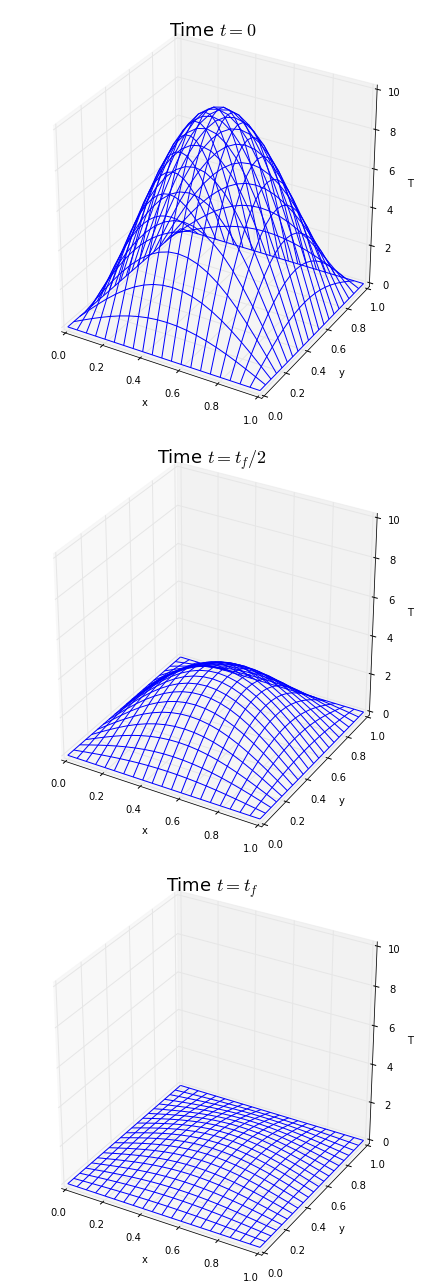

In [4]:
# Now make the plots
fig = plt.figure(1, figsize=(6,18))

ax1 = fig.add_subplot(3, 1, 1, projection='3d')
ax1.plot_wireframe(x[:,:,0], y[:,:,0], T[:,:,0]) 
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('T')
ax1.set_zlim([0,10])
ax1.set_title('Time $t=0$', fontsize=18)

ax2 = fig.add_subplot(3, 1, 2, projection='3d')
ax2.plot_wireframe(x[:,:,0], y[:,:,0], T[:,:,4:6].mean(axis=2)) 
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('T')
ax2.set_zticks([0,2,4,6,8,10])
ax2.set_zlim([0,10])
ax2.set_title('Time $t=t_f/2$', fontsize=18)

ax3 = fig.add_subplot(3, 1, 3, projection='3d')
ax3.plot_wireframe(x[:,:,0], y[:,:,0], T[:,:,-1]) 
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('T')
ax3.set_zticks([0,2,4,6,8,10])
ax3.set_zlim([0,10])
ax3.set_title('Time $t=t_f$', fontsize=18)

fig.tight_layout()

plt.show()

### Use this last code block for testing things

In [ ]:
# Use this for testing things
z = np.log(np.e)
print z
print np.log(10)/2

# Summary

We have seen how to 
* Cast variables, print to screen using `print`, and make arrays/lists using built-in Python functions.
* Import and use a library. 
* Use the numpy library to work with arrays in Python.
* The expression array.shape gives the shape of an array.
* Use array[x, y] to select a single element from an array and correctly select components of an array by understanding that array indices start at 0, not 1.
* Use low:high to specify a slice that includes the indices from low to high-1.
* Use `#` to add some kind of explanation in the form of comments to programs.
* Use numpy.mean(array), numpy.max(array), and numpy.min(array) to calculate simple statistics.
* Use numpy.mean(array, axis=0) or numpy.mean(array, axis=1) to calculate statistics across the specified axis.
* Use the pyplot library from matplotlib for creating simple visualizations.
* Use numpy.linspace, and numpy.meshgrid to create regular grids.

# So what is next?

Much of scientific programming involves applications of basic logic (e.g., using conditional statements to determine an action), repeating operations across arrays (e.g., using for-loops), and making user-defined functions to handle problem-specific issues (e.g., defining a function that takes as input a spatial-temporal point $(x,y,t)$ and returns a temperature $T(x,y,t)$). We will study these ideas in more depth in the next notebook of our short course.  
